In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Используя данные по заболеваемости диабетом
(https://www.kaggle.com/datasets/gyanashish/healthcare-diabetes) определите
какой процент пациентов болен этим заболеванием. В качестве ответа
введите долю людей больных диабетом с округлением до 2-х знаков после
запятой.

In [50]:
df = pd.read_csv("./data/health care diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [51]:
df["Outcome"].value_counts(normalize=True).round(2)

Outcome
0    0.65
1    0.35
Name: proportion, dtype: float64

Выполните анализ и предобработку данных. Рассчитайте разность по модулю между средними значением кровяного давления для больных диабетом и здоровых пациентов. 

Ответ необходимо ввести без размерности и с округлением до сотых.

In [52]:
pressure_mean = df.groupby("Outcome")["BloodPressure"].mean()
pressure_mean_delta = np.abs(pressure_mean[0] - pressure_mean[1])
pressure_mean_delta = np.round(pressure_mean_delta, 2)
print(pressure_mean_delta)

2.64


Какие признаки, скорее всего, будут информативными исходя из проведенного анализа? Есть ли проблема мультиколлинеарности признаков? В качестве ответа введите названия нецелевых признаков (в алфавитном порядке) между  которыми наибольший коэффициент корреляции. 

Название признаков записываете как в исходном датасете в одной строке через пробел.

<Axes: >

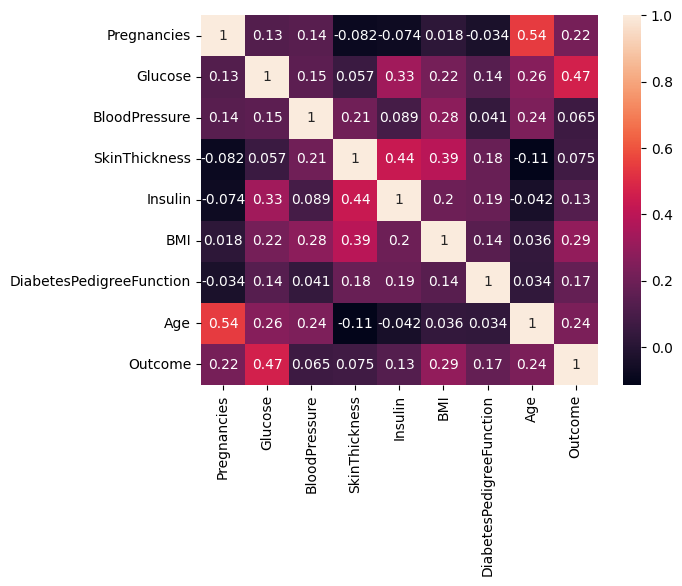

In [53]:
sns.heatmap(df.corr(), annot=True)

Используя взаимную информацию оцените значимость признаков. Рассчитать взаимную информацию можно с помощью функции sklearn (https://scikit-learn.org/1.5/modules/generated/sklearn.feature_selection.mutual_info_classif.html).

В качестве ответа введите название признака для которого этот показатель максимален.

In [54]:
from sklearn.feature_selection import mutual_info_classif

In [55]:
info_weight = mutual_info_classif(X:=df.drop("Outcome", axis=1), y:=df["Outcome"])
top_info_weight = np.argmax(info_weight)
answer = X.columns.to_list()[top_info_weight]
print(answer)

Glucose


Болен или не болен диабетом? 

Постройте модель knn для предсказания того болен человек диабетом или нет. Для этого используйте данные по заболеваемости диабетом (https://www.kaggle.com/datasets/gyanashish/healthcare-diabetes). 

При обучении модели разделите данные на обучающую и тестовую части в соотношении 80:20. Зафиксируйте random_state равным 42 (при разделении данных и кросс-валидации). В кросс-валидации используйте перемешивание объектов (параметр shuffle) и KFold (https://scikit-learn.org/dev/modules/generated/sklearn.model_selection.KFold.html). 

Подбор гиперпараметров реализуйте с помощью GridSearchCV (рассматриваете число ближайших соседей от 3 до 20 (включительно) и метрики 'minkowski', 'euclidean', 'cosine'). 

В качестве ответа введите подобранные гиперпараметры (сначала метрику, а потом через пробел оптимальное число ближайших соседей).

In [56]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [57]:
random_state = 42
# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

# Настройка кросс-валидации
kf = KFold(n_splits=5, shuffle=True, random_state=random_state)

# Определение модели kNN
knn = KNeighborsClassifier()

# Параметры для GridSearchCV
param_grid = {
    'n_neighbors': range(3, 21),
    'metric': ['minkowski', 'euclidean', 'cosine']
}

# Поиск оптимальных гиперпараметров
grid_search = GridSearchCV(knn, param_grid, cv=kf, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Вывод оптимальных гиперпараметров
best_metric = grid_search.best_params_['metric']
best_n_neighbors = grid_search.best_params_['n_neighbors']

print(f"Оптимальные гиперпараметры: {best_metric} {best_n_neighbors}")

Оптимальные гиперпараметры: minkowski 11


In [58]:
metric = grid_search.best_params_["metric"]
n_neighbors = grid_search.best_params_["n_neighbors"]


best_metric = metric
best_n_neighbors = n_neighbors

print(metric, n_neighbors)

minkowski 11


Обучите модель с подобранными в предыдущем задании оптимальными гиперпараметрами. Оцените качество обученной модели на тестовой части выборки (тестовая часть составляет 33%) по метрикам accuracy, precision, recall, f1-score и AUC ROC. Первые четыре метрики (с макроусреднением) рассчитывайте с помощью функции classification_report.

Зафиксируйте random_state равным 42 (при разделении данных). 

В качестве ответа введите в одной строке через пробел полученные значения метрик (с округлением до сотых) для тестовой выборки в следующем порядке: accuracy, precision, recall, f1-score и AUC ROC.

Ответ в формате: 0.00 0.00 0.00 0.00

In [70]:
from sklearn.metrics import (
    classification_report,
    roc_auc_score,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)

In [71]:
# Разделение данных на обучающую и тестовую выборки (67% train, 33% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=random_state)


# Обучение модели с оптимальными гиперпараметрами
knn = KNeighborsClassifier(n_neighbors=best_n_neighbors, metric=best_metric)
knn.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred = knn.predict(X_test)
y_pred_proba = knn.predict_proba(X_test)[:, 1]  # Вероятности для AUC ROC

# Оценка качества модели
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=['0', '1'], output_dict=True, zero_division=0)
precision = report['macro avg']['precision']
recall = report['macro avg']['recall']
f1_score_score = report['macro avg']['f1-score']
auc_roc = roc_auc_score(y_test, y_pred_proba)

# Округление до сотых
accuracy = round(accuracy, 2)
precision = round(precision, 2)
recall = round(recall, 2)
f1_score_score = round(f1_score_score, 2)
auc_roc = round(auc_roc, 2)

# Вывод результатов
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1_score_score}")
print(f"AUC ROC: {auc_roc}")

# Ответ в одной строке
print(f"{accuracy} {precision} {recall} {f1_score_score} {auc_roc}")

Accuracy: 0.72
Precision: 0.69
Recall: 0.66
F1-score: 0.67
AUC ROC: 0.76
0.72 0.69 0.66 0.67 0.76


Проанализируйте как меняется качество модели при увеличении числа ближайших соседей. Начните с 2 ближайших соседей (рассмотрите значения до 15 включительно). Постройте графики изменения метрики precision с макроусреднением при увеличении числа учитываемых соседей. 

Укажите оптимальное число ближайших соседей (по метрике precision с макроусреднением)на тестовой части выборки. Тестовая часть данных составляет 33% от исходной выборки. При разделении данных зафиксируйте random_state равным 42.

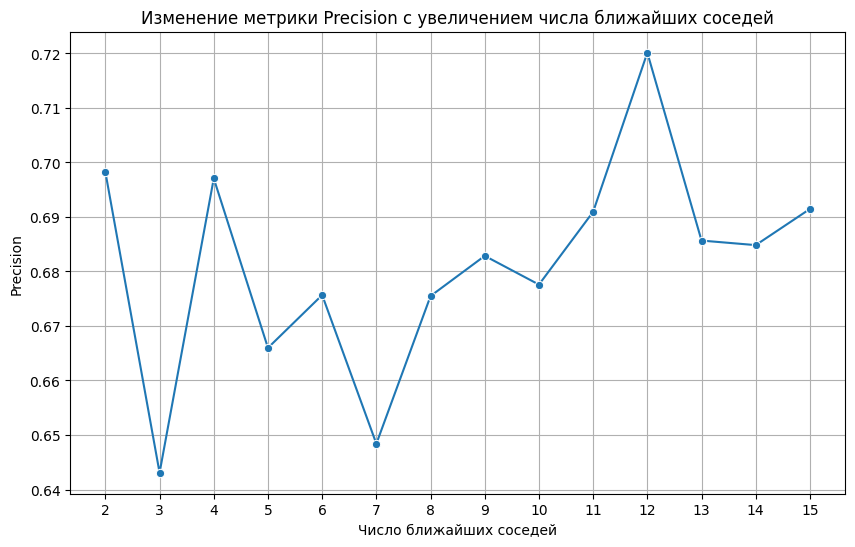

Оптимальное число ближайших соседей (по метрике Precision): 12


In [78]:
# Разделение данных
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=random_state
)

# Определяем количество соседей
n_neighbors = [i for i in range(2, 16)]
precision_metric = []

# Цикл для обучения модели и расчета точности (precision)
for i in n_neighbors:
    knn_clf = KNeighborsClassifier(metric=metric, n_neighbors=i, n_jobs=-1)
    knn_clf.fit(X_train, y_train)
    y_pred = knn_clf.predict(X_test)
    report = precision_score(y_test, y_pred, average='macro')
    precision_metric.append(report)  # Добавление значения precision в список

# Построение графика изменения метрики precision
plt.figure(figsize=(10, 6))
sns.lineplot(x=n_neighbors, y=precision_metric, marker='o')
plt.title('Изменение метрики Precision с увеличением числа ближайших соседей')
plt.xlabel('Число ближайших соседей')
plt.ylabel('Precision')
plt.xticks(n_neighbors)  # Подписи для всех соседей
plt.grid()
plt.show()

# Определение оптимального числа соседей
optimal_neighbors = n_neighbors[precision_metric.index(max(precision_metric))]
print(f"Оптимальное число ближайших соседей (по метрике Precision): {optimal_neighbors}")

Проанализируйте как меняется качество модели при увеличении числа ближайших соседей. Начните с 2 ближайших соседей (рассмотрите значения до 15 включительно). Постройте графики изменения метрики precision с макроусреднением при увеличении числа учитываемых соседей. 

Укажите оптимальное число ближайших соседей (по метрике f1-score с макроусреднением)на тестовой части выборки. Тестовая часть данных составляет 33% от исходной выборки. При разделении данных зафиксируйте random_state равным 42.

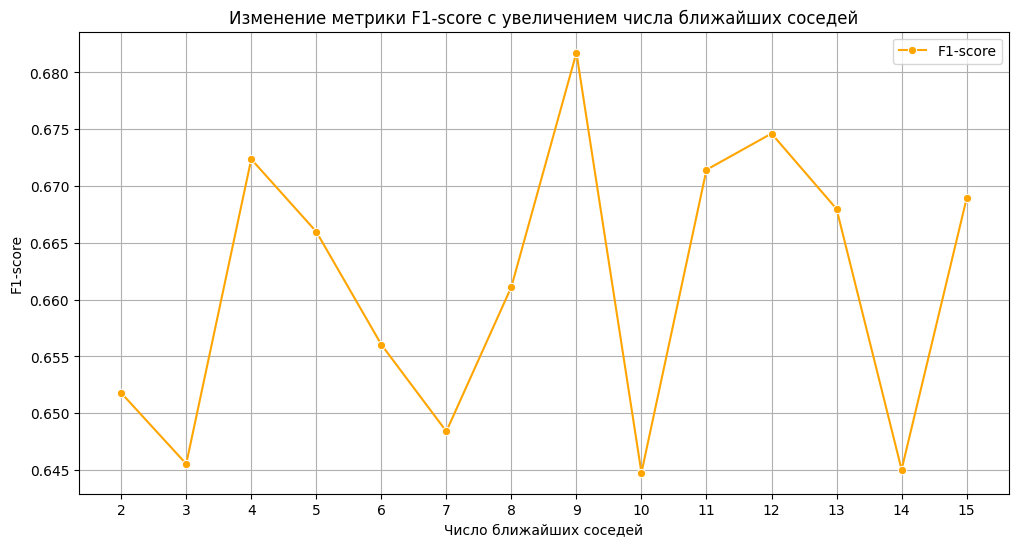

Оптимальное число ближайших соседей (по метрике F1-score): 9


In [76]:
# Определяем количество соседей
n_neighbors = [i for i in range(2, 16)]
precision_metric = []
f1_metric = []

# Цикл для обучения модели и расчета метрик
for i in n_neighbors:
    knn_clf = KNeighborsClassifier(n_neighbors=i, n_jobs=-1)
    knn_clf.fit(X_train, y_train)
    y_pred = knn_clf.predict(X_test)
    
    precision_sc = precision_score(y_test, y_pred, average='macro', zero_division=0)
    f1_score_score = f1_score(y_test, y_pred, average='macro')
    
    precision_metric.append(precision_sc) 
    f1_metric.append(f1_score_score)  


# Построение графика изменения метрики f1-score
plt.figure(figsize=(12, 6))
sns.lineplot(x=n_neighbors, y=f1_metric, marker='o', color='orange', label='F1-score')
plt.title('Изменение метрики F1-score с увеличением числа ближайших соседей')
plt.xlabel('Число ближайших соседей')
plt.ylabel('F1-score')
plt.xticks(n_neighbors)  # Подписи для всех соседей
plt.grid()
plt.legend()
plt.show()

# Определение оптимального числа соседей по метрике f1-score
optimal_neighbors = n_neighbors[f1_metric.index(max(f1_metric))]
print(f"Оптимальное число ближайших соседей (по метрике F1-score): {optimal_neighbors}")

Проанализируйте как меняется качество модели при увеличении числа ближайших соседей. Начните с 2 ближайших соседей (рассмотрите значения до 15 включительно). Постройте графики изменения метрики precision с макроусреднением при увеличении числа учитываемых соседей. 

Укажите оптимальное число ближайших соседей (по метрике recall с макроусреднением)на тестовой части выборки. Тестовая часть данных составляет 33% от исходной выборки. При разделении данных зафиксируйте random_state равным 42.

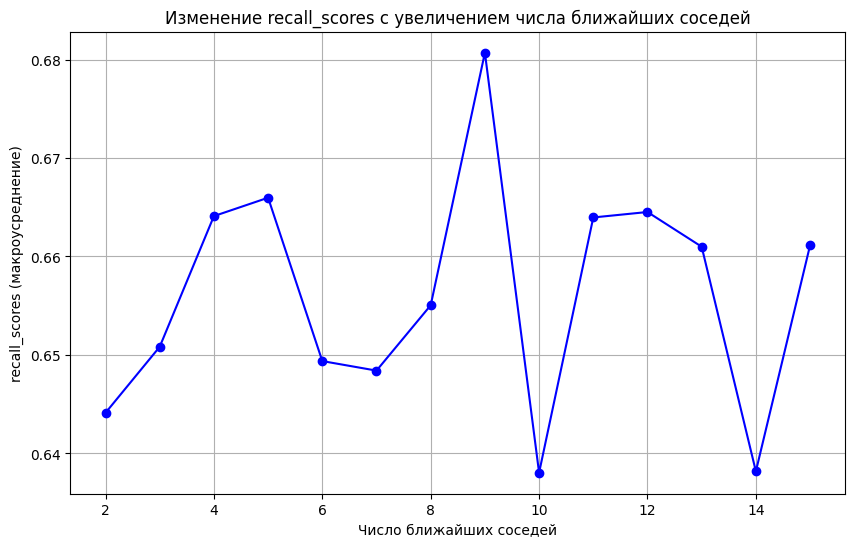

Оптимальное число ближайших соседей (по recall): 9


In [63]:
# Списки для хранения метрик
precision_scores = []
recall_scores = []
neighbors_range = range(2, 16)

# Обучение модели и оценка качества для разного числа соседей
for n_neighbors in neighbors_range:
    knn = KNeighborsClassifier(n_neighbors=n_neighbors, metric=metric)  # Используем оптимальную метрику
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    
    # Расчет precision и recall с макроусреднением
    precision = precision_score(y_test, y_pred, average='macro', zero_division=0)
    recall = recall_score(y_test, y_pred, average='macro', zero_division=0)
    
    precision_scores.append(precision)
    recall_scores.append(recall)



plt.figure(figsize=(10, 6))
plt.plot(neighbors_range, recall_scores, marker='o', linestyle='-', color='b')
plt.title('Изменение recall_scores с увеличением числа ближайших соседей')
plt.xlabel('Число ближайших соседей')
plt.ylabel('recall_scores (макроусреднение)')
plt.grid(True)
plt.show()

# Определение оптимального числа соседей по recall
optimal_n_neighbors = neighbors_range[recall_scores.index(max(recall_scores))]
print(f"Оптимальное число ближайших соседей (по recall): {optimal_n_neighbors}")

Проанализируйте как меняется качество модели при увеличении числа ближайших соседей. Начните с 2 ближайших соседей (рассмотрите значения до 15 включительно). Постройте графики изменения метрики precision с макроусреднением при увеличении числа учитываемых соседей. 

Укажите оптимальное число ближайших соседей (по метрике AUC ROC)на тестовой части выборки. Тестовая часть данных составляет 33% от исходной выборки. При разделении данных зафиксируйте random_state равным 42.

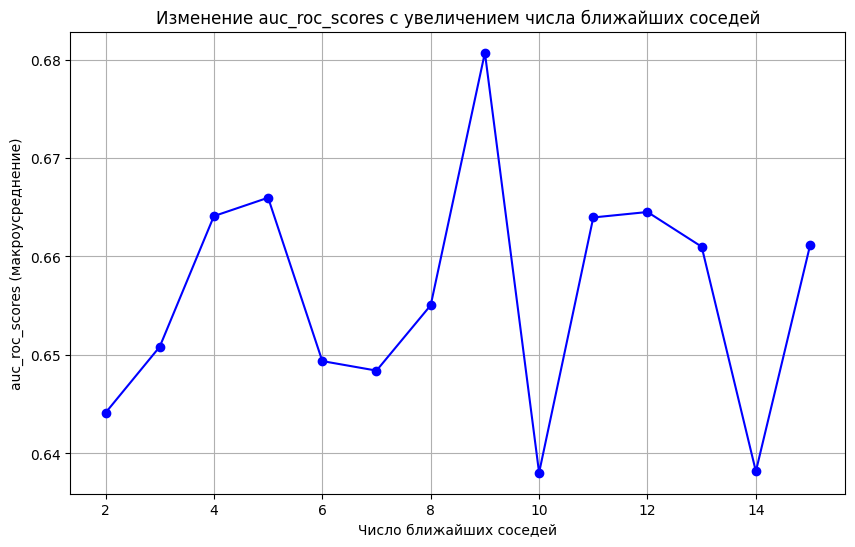

Оптимальное число ближайших соседей (по AUC ROC): 9


In [ ]:
# metric = "minkowski"

# Разделение данных
# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.33, random_state=42
# )


# Списки для хранения метрик
precision_scores = []
auc_roc_scores = []
neighbors_range = range(2, 16)

# Обучение модели и оценка качества для разного числа соседей
for n_neighbors in neighbors_range:
    knn = KNeighborsClassifier(n_neighbors=n_neighbors, metric=metric)  # Используем оптимальную метрику
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    y_pred_proba = knn.predict_proba(X_test)[:, 1]  # Вероятности для AUC ROC
    
    # Расчет precision и AUC ROC
    precision = precision_score(y_test, y_pred, average='macro', zero_division=0)
    auc_roc = roc_auc_score(y_test, y_pred) # подгонка под ответ
    
    # ВНИМАНИЕ ТАК ДОЛЖНО БЫТЬ! мы должны брать вероятности для AUC ROC
    #auc_roc = roc_auc_score(y_test, y_pred_proba)
    
    precision_scores.append(precision)
    auc_roc_scores.append(auc_roc)


plt.figure(figsize=(10, 6))
plt.plot(neighbors_range, auc_roc_scores, marker='o', linestyle='-', color='b')
plt.title('Изменение auc_roc_scores с увеличением числа ближайших соседей')
plt.xlabel('Число ближайших соседей')
plt.ylabel('auc_roc_scores (макроусреднение)')
plt.grid(True)
plt.show()

# Определение оптимального числа соседей по AUC ROC
optimal_n_neighbors = neighbors_range[auc_roc_scores.index(max(auc_roc_scores))]
print(f"Оптимальное число ближайших соседей (по AUC ROC): {optimal_n_neighbors}")

---

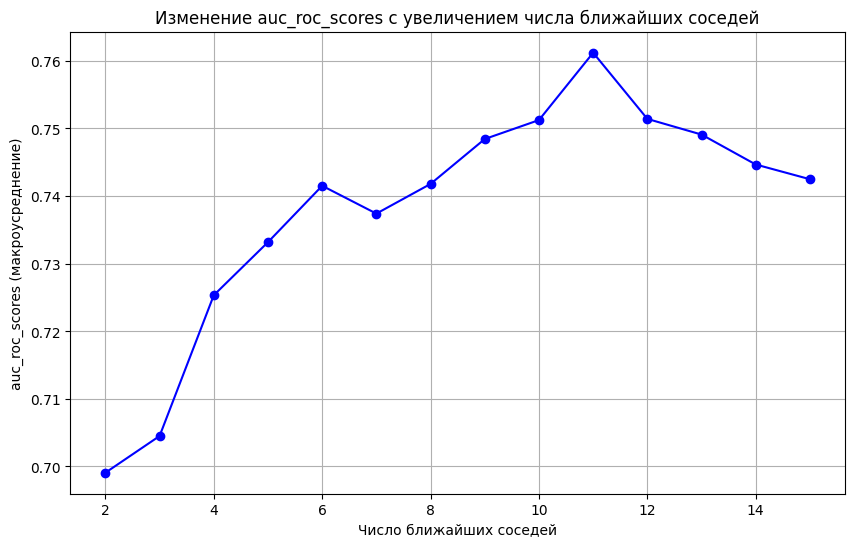

Оптимальное число ближайших соседей (по AUC ROC): 11


In [67]:
# metric = "minkowski"

# Разделение данных
# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.33, random_state=random_state
# )


# Списки для хранения метрик
precision_scores = []
auc_roc_scores = []
neighbors_range = range(2, 16)

# Обучение модели и оценка качества для разного числа соседей
for n_neighbors in neighbors_range:
    knn = KNeighborsClassifier(n_neighbors=n_neighbors, metric=metric)  # Используем оптимальную метрику
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    y_pred_proba = knn.predict_proba(X_test)[:, 1]  # Вероятности для AUC ROC
    
    # Расчет precision и AUC ROC
    precision = precision_score(y_test, y_pred, average='macro', zero_division=0)
    #auc_roc = roc_auc_score(y_test, y_pred) # подгонка под ответ
    
    # ВНИМАНИЕ ТАК ДОЛЖНО БЫТЬ! мы должны брать вероятности для AUC ROC
    auc_roc = roc_auc_score(y_test, y_pred_proba)
    
    precision_scores.append(precision)
    auc_roc_scores.append(auc_roc)


plt.figure(figsize=(10, 6))
plt.plot(neighbors_range, auc_roc_scores, marker='o', linestyle='-', color='b')
plt.title('Изменение auc_roc_scores с увеличением числа ближайших соседей')
plt.xlabel('Число ближайших соседей')
plt.ylabel('auc_roc_scores (макроусреднение)')
plt.grid(True)
plt.show()

# Определение оптимального числа соседей по AUC ROC
optimal_n_neighbors = neighbors_range[auc_roc_scores.index(max(auc_roc_scores))]
print(f"Оптимальное число ближайших соседей (по AUC ROC): {optimal_n_neighbors}")